(2, 3)
[(2, 3), (0, 0)]
(3.5, 1.75)
[(0, 0),(5, 0.5),(2, 3)]


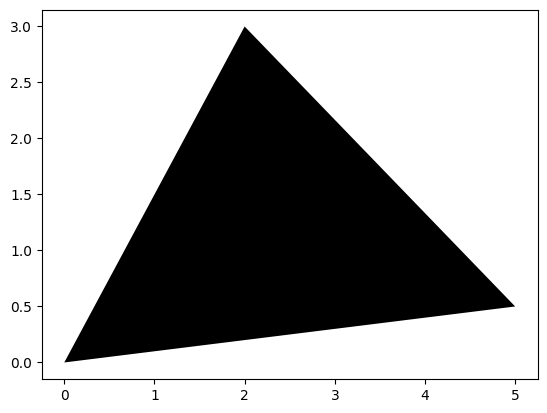

In [1]:
import matplotlib.pyplot as plt
    
class Triangle():
    def __init__(self, V):
        # Type checking ------------
        if isinstance(V,list) and len(V) == 3:
            pass
        else:
            raise(Exception('Coordinates should be arrange List'))
        #------------
        if all(isinstance(ele,tuple) for ele in V):
            pass
        else:
            raise(Exception('Coordinates should be Tuple'))
            
        #------------
        self.V=V

    def vertex(self,n):
        return (self.V[n%3-1][0],self.V[n%3-1][1])
    
    def side(self,n):
        return [self.vertex(n),self.vertex(n+1)]
    
    def midpoint(self,n):
        return (sum([x for x, y in self.side(n)])/2,\
                sum([y for x, y in self.side(n)])/2)
    
    def show(self, color='k'):
        xs=[]; ys=[];
        for i in range(1,5):
            xs.append(self.vertex(i)[0])
            ys.append(self.vertex(i)[1])
        plt.fill(xs,ys,color)
    
    def __str__(self):
        return f"[{self.vertex(1)},{self.vertex(2)},{self.vertex(3)}]"
    
    
# Test case ----------------------------------------------------------    
a=Triangle([(0,0),(5,0.5),(2,3)])
print(a.vertex(3))
print(a.side(3))
print(a.midpoint(2))
print(a)
a.show()

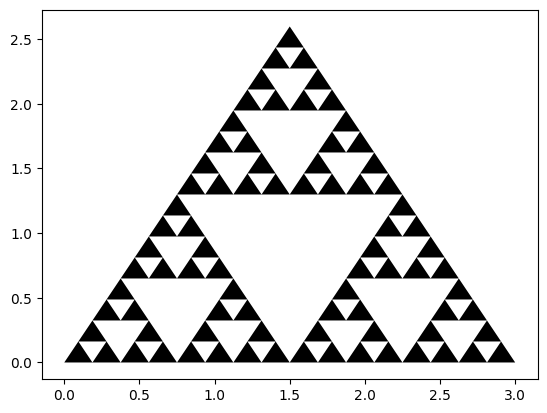

In [4]:
def sierpinski_triangle(triangle_1, i):
    if i == 1:
        triangle_1.show(color='k')
        
        triangle_2=Triangle([triangle_1.midpoint(1), triangle_1.midpoint(2), triangle_1.midpoint(3)])
        triangle_2.show(color='w')
    else:
        triangle_3=Triangle([triangle_1.vertex(1), triangle_1.midpoint(1), triangle_1.midpoint(3)])
        triangle_4=Triangle([triangle_1.midpoint(1), triangle_1.vertex(2),  triangle_1.midpoint(2)])
        triangle_5=Triangle([triangle_1.midpoint(3), triangle_1.midpoint(2),  triangle_1.vertex(3)])
        sierpinski_triangle(triangle_3, i-1)
        sierpinski_triangle(triangle_4, i-1)
        sierpinski_triangle(triangle_5, i-1)

# Test case ----------------------------------------------------------
side = 3; #The length of sides
a=Triangle([(0,0),(side,0),(side/2,(side**2-(side/2)**2)**0.5)])
sierpinski_triangle(a,4)

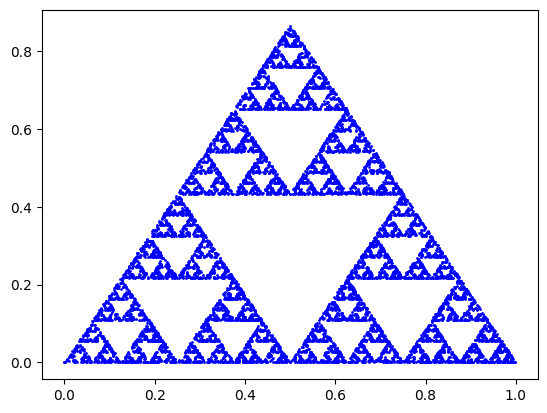

In [5]:
from numpy.random import randint
import matplotlib.pyplot as plt

def my_sierpinski(n):

    # Vertices of an equilateral triangle
    V = [(0, 0), (0.5, (3)**0.5/2), (1, 0)]

    x = [0]
    y = [0]
    for i in range(1, n):
        k = randint(0, 3) # a random vertex
        x.append(0.5*(V[k][0]+x[i-1]))
        y.append(0.5*(V[k][1]+y[i-1]))
    
    plt.scatter(x, y, s=1, color='b')
    plt.show()
    
my_sierpinski(10000)